In [1]:
from sklearn.datasets import make_classification
import pandas as pd

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
X , y = make_classification(
    n_samples= 1000,
    n_features = 10, 
    n_informative=5, 
    n_classes = 2,
    random_state = 42
)

In [40]:
feature_name = [f'feature_{i}' for i in range(X.shape[1])]

df = pd.DataFrame(X, columns=feature_name)
df['target'] = y

In [41]:
df.head(5)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,1.125100,1.178124,0.493516,0.790880,-0.614278,1.347020,1.419515,1.357325,0.966041,-1.981139,1
1,-0.564641,3.638629,-1.522415,-1.541705,1.616697,4.781310,3.190292,-0.890254,1.438826,-3.828748,0
2,0.516313,2.165426,-0.628486,-0.386923,0.492518,1.442381,1.332905,-1.958175,-0.348803,-1.804124,0
3,0.537282,0.966618,-0.115420,0.670755,-0.958516,0.871440,0.508186,-1.034471,-1.654176,-1.910503,1
4,0.278385,1.065828,-1.724917,-2.235667,0.715107,0.731249,-0.674119,0.598330,-0.524283,1.047610,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_0  1000 non-null   float64
 1   feature_1  1000 non-null   float64
 2   feature_2  1000 non-null   float64
 3   feature_3  1000 non-null   float64
 4   feature_4  1000 non-null   float64
 5   feature_5  1000 non-null   float64
 6   feature_6  1000 non-null   float64
 7   feature_7  1000 non-null   float64
 8   feature_8  1000 non-null   float64
 9   feature_9  1000 non-null   float64
 10  target     1000 non-null   int32  
dtypes: float64(10), int32(1)
memory usage: 82.2 KB


In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
feature_0,1000.0,0.480472,1.583809,-4.661168,-0.542215,0.583361,1.521656,5.066061
feature_1,1000.0,-0.011035,1.618548,-5.814203,-1.132212,0.029747,1.077206,4.605669
feature_2,1000.0,-0.072376,1.024196,-3.031194,-0.779532,-0.041891,0.644444,3.276399
feature_3,1000.0,-0.492447,1.518933,-4.258034,-1.504082,-0.760929,0.230285,5.685693
feature_4,1000.0,0.469059,1.489777,-3.889284,-0.609955,0.541561,1.447875,6.036793
feature_5,1000.0,0.499845,1.621358,-4.341477,-0.674893,0.449055,1.531734,5.608412
feature_6,1000.0,0.455850,2.000162,-7.298063,-0.776099,0.553223,1.757939,7.456970
feature_7,1000.0,0.017115,1.029048,-3.254479,-0.676648,0.025772,0.679153,3.089890
feature_8,1000.0,-0.058077,1.046402,-3.582063,-0.744499,-0.081367,0.659029,2.986329
feature_9,1000.0,0.631419,2.806143,-8.102614,-1.034635,0.987519,2.371964,7.933944


In [44]:
df.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'target'],
      dtype='object')

In [45]:
# check missing value 

df.isnull().sum()

feature_0    0
feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
feature_6    0
feature_7    0
feature_8    0
feature_9    0
target       0
dtype: int64

In [46]:
df.duplicated().sum()

0

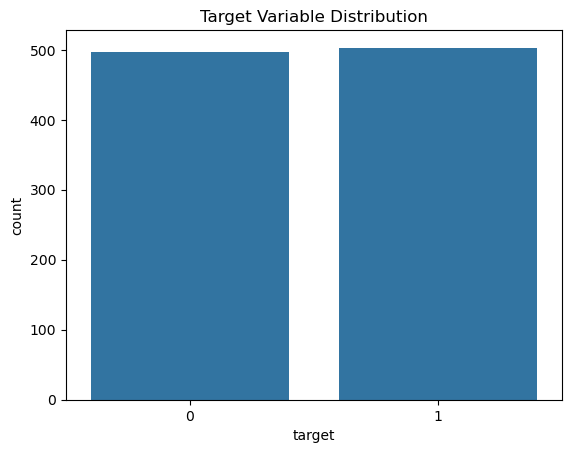

In [47]:
# Distribution of Target Variable

sns.countplot(x='target', data=df)
plt.title("Target Variable Distribution")
plt.show()

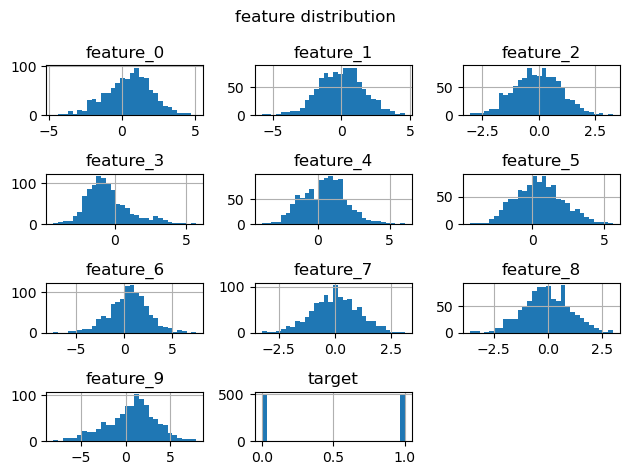

In [48]:
# check distribution of feature

plt.Figure(figsize=(14, 12))
df.hist(bins=30)
plt.suptitle('feature distribution')
plt.tight_layout()

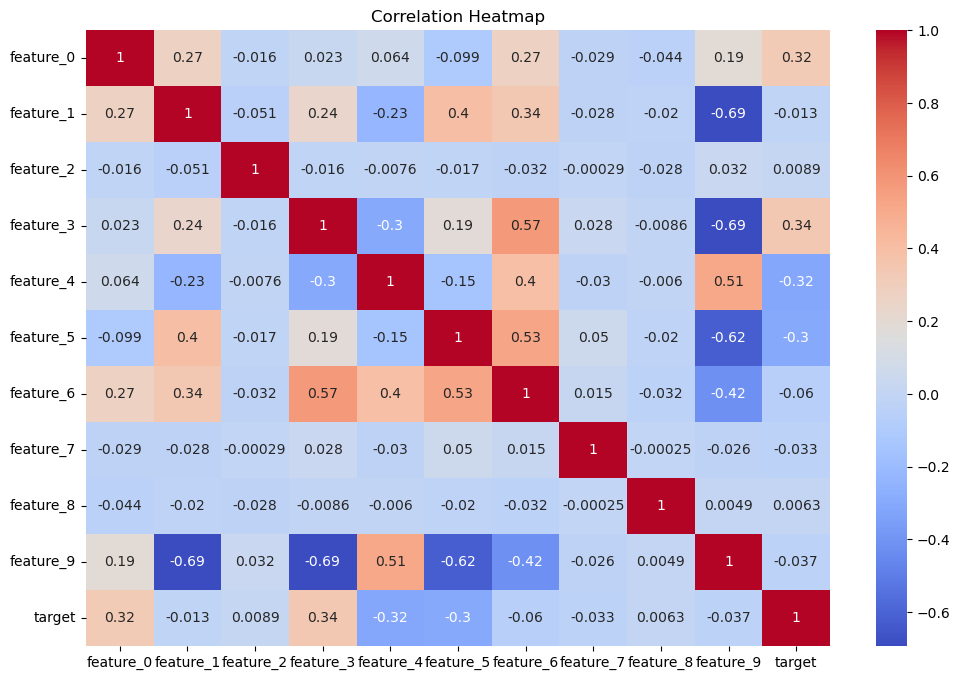

In [49]:
# Correlation Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


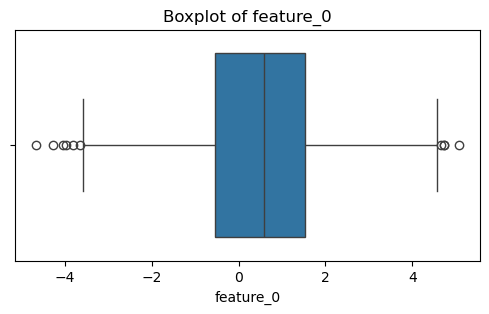

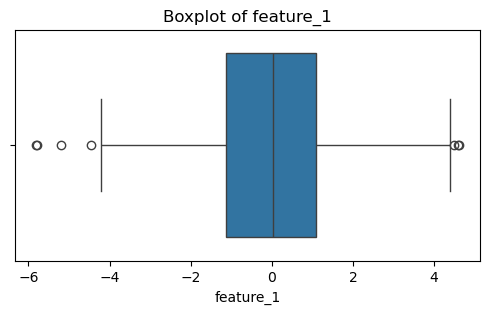

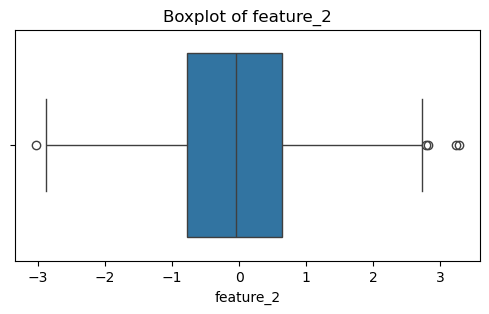

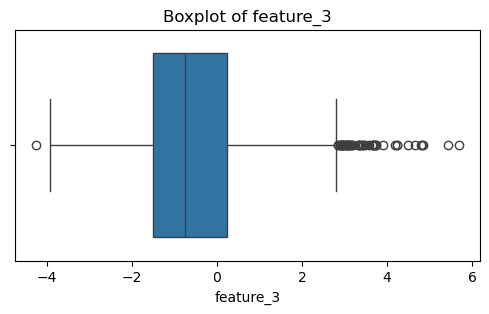

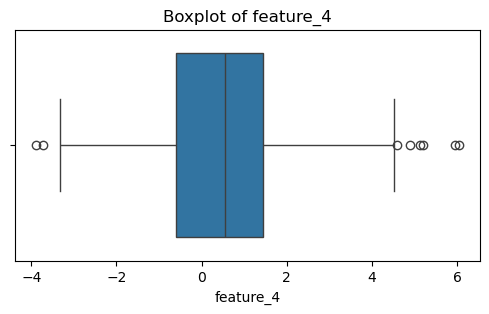

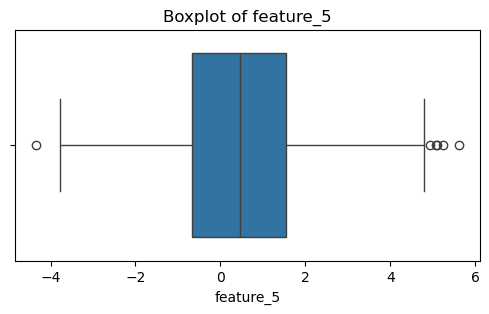

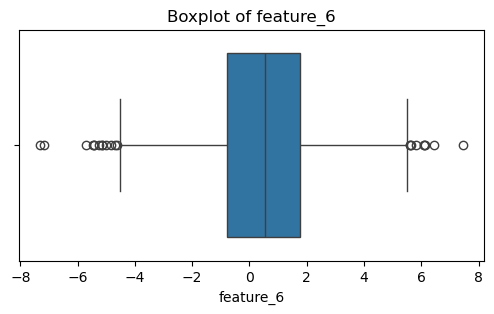

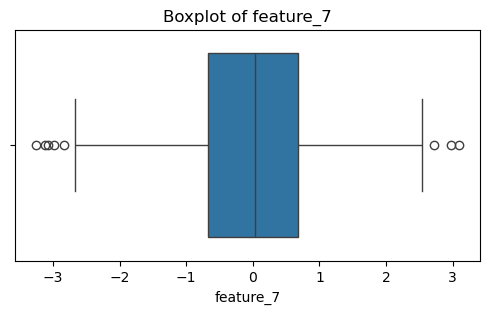

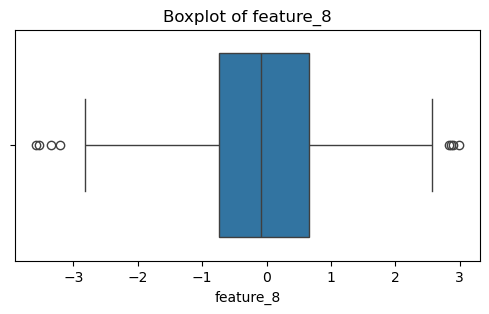

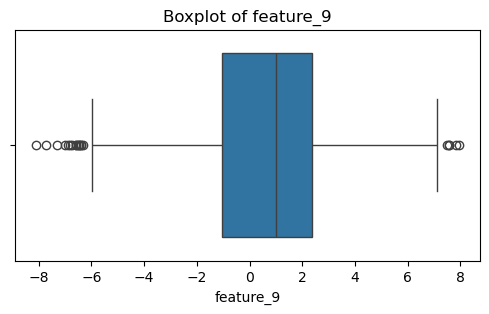

In [50]:
# Boxplot for Outliers

for col in df.columns[:-1]:  # Exclude target
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


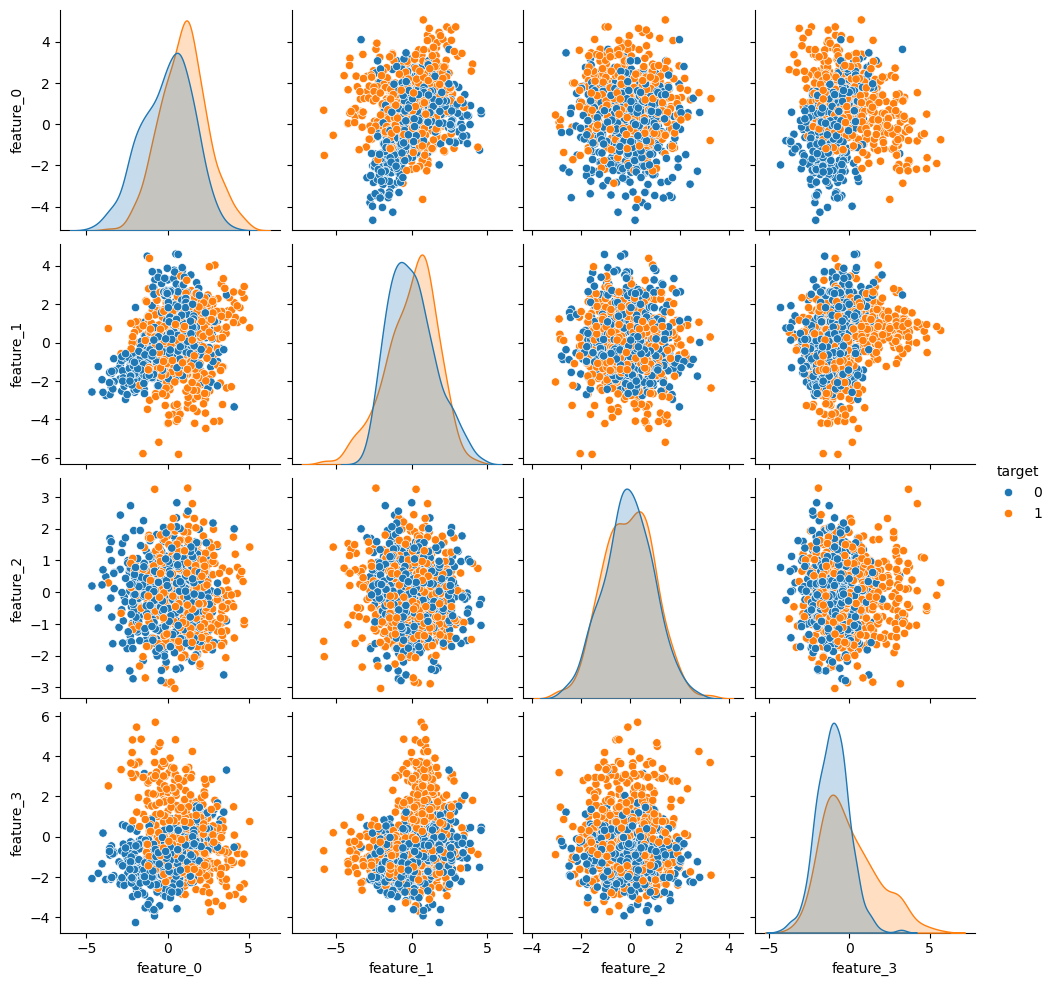

In [51]:
sns.pairplot(df, hue='target', vars=df.columns[:4])  # Use first few features to avoid clutter
plt.show()


In [52]:
# Class-wise Feature Means

class_means = df.groupby('target').mean()
class_means.T # Transposed for better viewing


target,0,1
feature_0,-0.027702,0.982584
feature_1,0.009897,-0.031717
feature_2,-0.081547,-0.063315
feature_3,-1.010071,0.019003
feature_4,0.941713,0.002042
feature_5,0.988816,0.016707
feature_6,0.576423,0.336716
feature_7,0.051454,-0.016814
feature_8,-0.064658,-0.051575
feature_9,0.735764,0.528318


In [53]:
# How to Remove Outliers (Per Feature)

import numpy as np

def remove_outliers_iqr(df, feature_cols):
    # Create a copy to avoid modifying the original DataFrame
    df_clean = df.copy()
    
    for col in feature_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Keep only rows within the bounds
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
        
    return df_clean


In [54]:
feature_columns = df.columns[:-1]  # Exclude target
df_no_outliers = remove_outliers_iqr(df, feature_columns)

print("Original shape:", df.shape)
print("Shape after removing outliers:", df_no_outliers.shape)


Original shape: (1000, 11)
Shape after removing outliers: (871, 11)


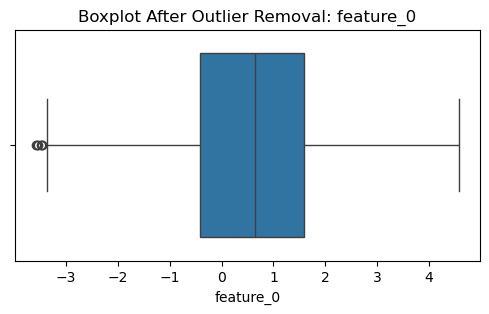

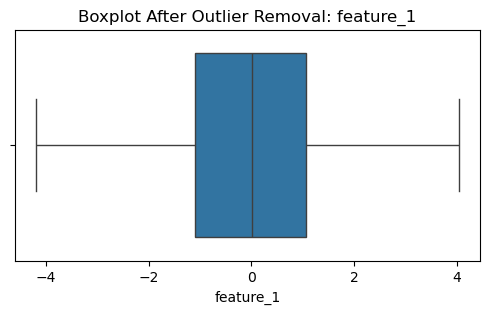

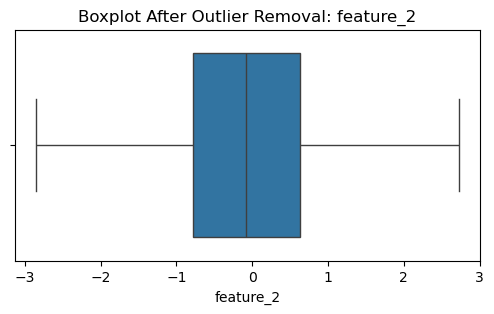

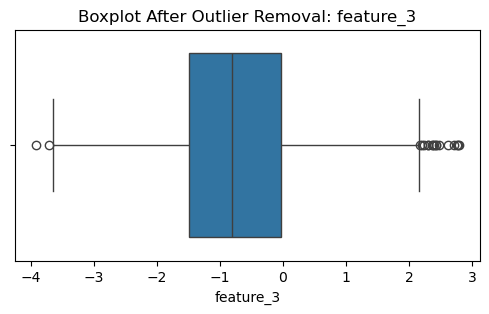

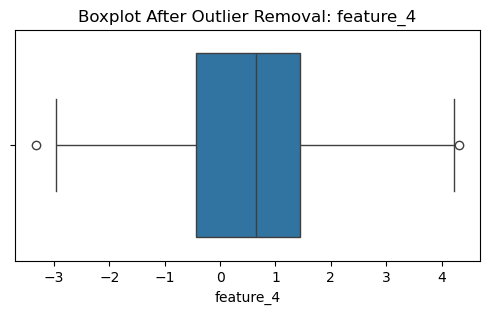

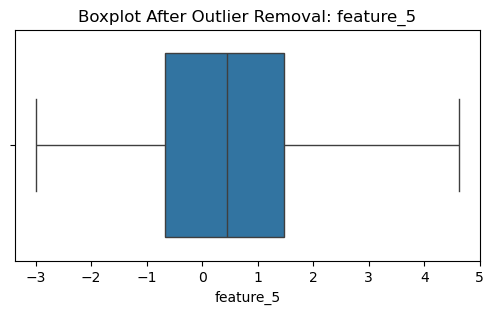

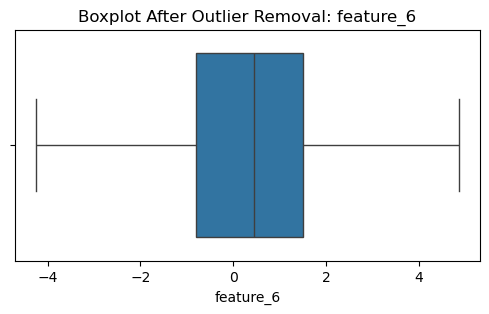

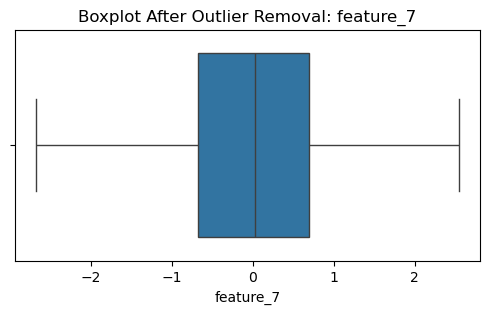

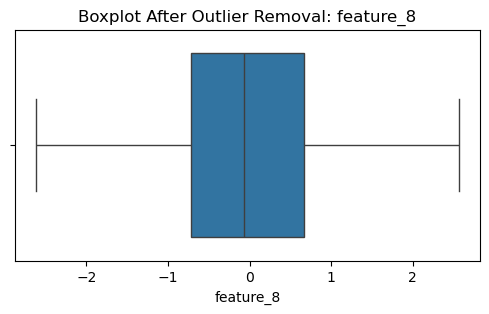

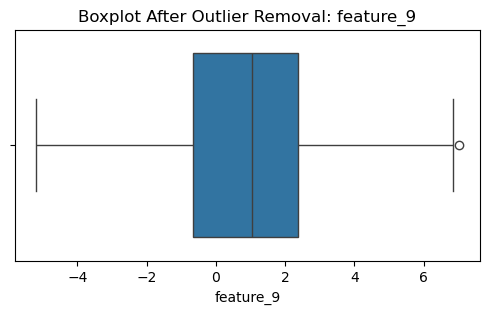

In [55]:
for col in df_no_outliers.columns[:-1]:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df_no_outliers[col])
    plt.title(f"Boxplot After Outlier Removal: {col}")
    plt.show()


In [56]:
df_no_outliers.head(7)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,1.125100,1.178124,0.493516,0.790880,-0.614278,1.347020,1.419515,1.357325,0.966041,-1.981139,1
2,0.516313,2.165426,-0.628486,-0.386923,0.492518,1.442381,1.332905,-1.958175,-0.348803,-1.804124,0
3,0.537282,0.966618,-0.115420,0.670755,-0.958516,0.871440,0.508186,-1.034471,-1.654176,-1.910503,1
4,0.278385,1.065828,-1.724917,-2.235667,0.715107,0.731249,-0.674119,0.598330,-0.524283,1.047610,0
5,1.275364,0.846596,0.033723,-0.408334,-0.273116,1.197141,0.613567,0.772315,-0.135526,-0.379764,1
6,2.663044,-1.265577,-0.333946,-0.567880,0.806199,-2.330133,-0.476078,0.212820,0.716046,4.412830,0
7,1.165543,-1.432566,-0.660028,-0.772736,3.864891,-2.404560,1.559363,0.549430,-1.229018,5.112477,1


In [57]:
df_no_outliers.shape

(871, 11)

In [58]:
df_clean = df_no_outliers

In [ ]:
df_clean.shape

(871, 11)

In [ ]:
# assign vatoable to traget feature 

y = df_clean['target']

In [60]:
y.head(5)

0    1
2    0
3    1
4    0
5    1
Name: target, dtype: int32

In [ ]:
# now drop traget variable 

X_clean = df_clean.drop(columns= 'target')

# Train-Test Split

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)

 # Feature Scaling (Optional but recommended for distance-based models)

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()

# only on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection and Training

In [68]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [69]:
# Model Evaluation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9028571428571428
Confusion Matrix:
 [[83 11]
 [ 6 75]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.91        94
           1       0.87      0.93      0.90        81

    accuracy                           0.90       175
   macro avg       0.90      0.90      0.90       175
weighted avg       0.90      0.90      0.90       175



# Hyperparameter Tuning (Optional but recommended)

In [70]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20]
}

grid = GridSearchCV(RandomForestClassifier(), params, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Params:", grid.best_params_)


Best Params: {'max_depth': 20, 'n_estimators': 100}


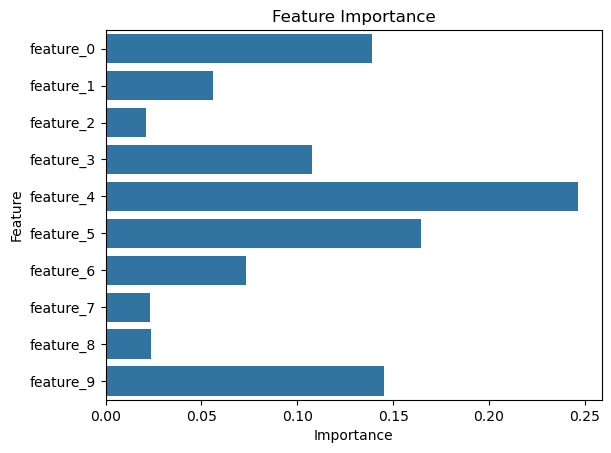

In [73]:
# Feature Importance (Optional)

import matplotlib.pyplot as plt
import seaborn as sns

# Use the original column names from X before scaling 
importances = model.feature_importances_
feature_names = X_clean.columns  

# Plot feature importance
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [74]:
# Retrain the Final Model on Training Data


from sklearn.ensemble import RandomForestClassifier

# Use the best parameters from GridSearchCV
final_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    random_state=42
)

final_model.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=20, random_state=42)

In [76]:
# Evaluate the Final Model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_final_pred = final_model.predict(X_test_scaled)

print("✅ Final Model Accuracy:", accuracy_score(y_test, y_final_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_final_pred))
print("Classification Report:\n", classification_report(y_test, y_final_pred))


✅ Final Model Accuracy: 0.9028571428571428
Confusion Matrix:
 [[83 11]
 [ 6 75]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.91        94
           1       0.87      0.93      0.90        81

    accuracy                           0.90       175
   macro avg       0.90      0.90      0.90       175
weighted avg       0.90      0.90      0.90       175



In [77]:
import joblib

joblib.dump(final_model, 'final_random_forest_model.pkl')

['final_random_forest_model.pkl']

# test the machine learning model 

In [78]:
import joblib

# Load the saved model
model = joblib.load('final_random_forest_model.pkl')


In [86]:
# Create random input data

# Make sure the number of features in the input matches the training data.


import numpy as np

# Example: if your model was trained on 10 features
random_input = np.random.rand(1, 10)  # shape = (1 sample, 10 features)

# Predict using the loaded model
prediction = model.predict(random_input)

print("Prediction:", prediction)


Prediction: [0]


In [87]:
random_data = [[1.125100, 1.178124, 0.493516, 0.790880, -0.614278,
                1.347020, 1.419515, 1.357325, 0.966041, -1.981139]]

# Make prediction
prediction = model.predict(random_data)

print("Prediction:", prediction)

Prediction: [1]


In [94]:
random_data = [[0.115110, 0.3278124, 0.423516, 0.670880, -0.614211,
                0.347020, 0.419515, 0.807345, 0.966041, -0.982539]]

# Make prediction
prediction = model.predict(random_data)

print("Prediction:", prediction)

Prediction: [1]
